

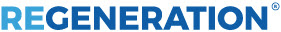






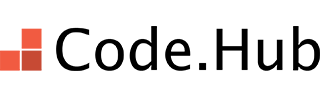

# Group Project March 2021
ReGeneration Academy on Big Data & Artificial Intelligence (powered by Microsoft) | A case study for predicting the price of an Airbnb listing in Athens using Microsoft Azure 


## 5 Detailed Objectives
### 5.1 Exploratory Data Analysis



#### Importing needed libraries

In [69]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
from IPython import display
import plotly.express as px
import collections as col
from wordcloud import WordCloud
import warnings
from helper_functions.cleanRows import clean_rows
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

file = "data/listings.csv"

# the file should be in the directory "data"

pathToFile = os.path.abspath('') + "/" + file
data = pd.read_csv(file)

#### 1. How many samples and features does each file have? 

In [70]:
print( " The number of samples are  : " + str( len(data) ) )
print( " The number of features are : " + str( len(data.columns) ))

 The number of samples are  : 9467
 The number of features are : 74


#### 2. What are the types of your features?

In [71]:
features_types = data.dtypes
features_types = features_types.to_frame(name="type")
print(features_types)


                                                 type
id                                              int64
listing_url                                    object
scrape_id                                       int64
last_scraped                                   object
name                                           object
...                                               ...
calculated_host_listings_count                  int64
calculated_host_listings_count_entire_homes     int64
calculated_host_listings_count_private_rooms    int64
calculated_host_listings_count_shared_rooms     int64
reviews_per_month                             float64

[74 rows x 1 columns]


#### 3. Are there any missing values? If yes, how many and how many rows are affected?

In [72]:

missing_values_array = np.array(data.isna().sum(axis = 1))
missing_values = data.isna().values.any()
total_missing_values = sum(missing_values_array)

missing_values_rows = len(missing_values_array[np.where(missing_values_array > 1)])

print("The number of the missing values is {} and it affects {} rows.".format(total_missing_values, missing_values_rows))


The number of the missing values is 73754 and it affects 9467 rows.


#### 4. How many listings per neighbourhood are there?

In [73]:
for ind, val in data["neighbourhood_cleansed"].dropna().value_counts().iteritems():
    print("There are {} listings in neighbourhood {}.".format(val, ind))

There are 1738 listings in neighbourhood ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ.
There are 815 listings in neighbourhood ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ.
There are 729 listings in neighbourhood ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ.
There are 689 listings in neighbourhood ΝΕΟΣ ΚΟΣΜΟΣ.
There are 580 listings in neighbourhood ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ.
There are 406 listings in neighbourhood ΠΑΓΚΡΑΤΙ.
There are 404 listings in neighbourhood ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ.
There are 333 listings in neighbourhood ΚΟΛΩΝΑΚΙ.
There are 305 listings in neighbourhood ΑΚΡΟΠΟΛΗ.
There are 302 listings in neighbourhood ΑΜΠΕΛΟΚΗΠΟΙ.
There are 282 listings in neighbourhood ΘΗΣΕΙΟ.
There are 263 listings in neighbourhood ΚΥΨΕΛΗ.
There are 248 listings in neighbourhood ΚΕΡΑΜΕΙΚΟΣ.
There are 221 listings in neighbourhood ΠΕΤΡΑΛΩΝΑ.
There are 182 listings in neighbourhood ΣΤΑΔΙΟ.
There are 166 listings in neighbourhood ΙΛΙΣΙΑ.
There are 148 listings in neighbourhood ΓΟΥΔΙ.
There are 146 listings in neighbourhood ΖΑΠΠΕΙΟ.
There are 125 listings in neig

#### 5. How many listings per room type are there?

In [74]:
for ind, val in data["room_type"].dropna().value_counts().iteritems():
    print("There are {} listings of room type {}.".format(val, ind))

There are 8283 listings of room type Entire home/apt.
There are 953 listings of room type Private room.
There are 158 listings of room type Hotel room.
There are 73 listings of room type Shared room.


#### 6. How many listings per room number are there?




In [75]:
data_q_4 = data[['bedrooms','bathrooms_text','amenities']]

#drop missing
data_q_4 = data_q_4.dropna().reset_index(drop = True)

#create 'list_kitchen', as if kitchen in amenities -> 1, else -> 0
data_q_4["amenities"] = data_q_4["amenities"].apply(clean_rows)
list_kitchen = []
for row in data_q_4["amenities"]:
    i=0
    for j in row:
        if "kitc" in j:
            list_kitchen.append(1)
            break
        else:
            i+=1
    if i == len(row):
        list_kitchen.append(0)
list_kitchen = pd.Series(list_kitchen)

#create 'kitcehn_y_n' column using 'list_kitchen'
data_q_4['kitchen_y_n'] = list_kitchen


#create 'list_bathrooms' from 'bathrooms_text' (str)
#'ind_bath' is a list which shows rows that did not change
ind_bath = []
list_bathrooms=[]
i=0
for word in data_q_4['bathrooms_text']:
    word = word.split()[0]
    if word[0] not in "0123456789":
        list_bathrooms.append(word)    
        ind_bath.append(i)
    else:
        list_bathrooms.append(float(word))
    i+=1
list_bathrooms
list_bathrooms = pd.Series(list_bathrooms)


#check which rows did not change and what values you should replace with 
list_bathrooms[ind_bath]
data_q_4['bathrooms_text'][ind_bath]


# all rows that did not change were 'Half bath', so we replace the value 0.5 instead
list_bathrooms[ind_bath] = 0.5

#create a column with the number of bathrooms (num)
data_q_4['number_of_bathrooms'] = list_bathrooms

# define room number ('room_number')  as ('bedrooms' +'kitchen_y_n' + 'number_of_bathrooms')
data_q_4['room_number'] = data_q_4['bedrooms'] + data_q_4['kitchen_y_n'] + data_q_4['number_of_bathrooms']


#listings per roomnumber
for i,j in data_q_4['room_number'].value_counts().iteritems():
    print("There are {} listings with {} number of rooms.".format(j,i))


There are 4187 listings with 3.0 number of rooms.
There are 1806 listings with 4.0 number of rooms.
There are 565 listings with 5.0 number of rooms.
There are 541 listings with 2.0 number of rooms.
There are 472 listings with 4.5 number of rooms.
There are 425 listings with 3.5 number of rooms.
There are 214 listings with 6.0 number of rooms.
There are 165 listings with 5.5 number of rooms.
There are 80 listings with 7.0 number of rooms.
There are 70 listings with 6.5 number of rooms.
There are 31 listings with 7.5 number of rooms.
There are 30 listings with 8.0 number of rooms.
There are 29 listings with 2.5 number of rooms.
There are 16 listings with 8.5 number of rooms.
There are 15 listings with 9.0 number of rooms.
There are 14 listings with 10.0 number of rooms.
There are 10 listings with 9.5 number of rooms.
There are 10 listings with 11.0 number of rooms.
There are 4 listings with 11.5 number of rooms.
There are 4 listings with 10.5 number of rooms.
There are 2 listings with 15

#### 7. What is the distribution of listings per host? What are the most listings that a single host has?

 The most listings for a single host are 141


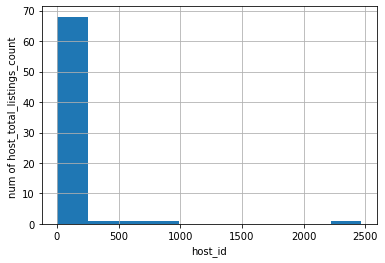

In [76]:
#a
data['host_id'].groupby(data.host_total_listings_count).nunique().hist()
plt.xlabel('host_id')
plt.ylabel('num of host_total_listings_count ')


#b
data2=data.groupby("host_id").filter(lambda x:len(x)==1)
print(f' The most listings for a single host are {"{:.0f}".format(max(data2["host_total_listings_count"]))}')

#### 8. When was the first host registered?

In [77]:
data["host_since"] = pd.to_datetime(data["host_since"])
data = data.sort_values( by = "host_since")

print("The first record of a host was in {}.".format(data.iloc[1]['host_since']))

The first record of a host was in 2009-09-08 00:00:00.


#### 9. What year had the most hosts registered?

In [78]:
year_registered         = pd.DatetimeIndex(data['host_since']).year
year_registered_grouped = (year_registered.value_counts().rename_axis("Year").reset_index(name = 'Count'))

year_most_hosts         = year_registered_grouped["Year"][0].astype('int')


print("The year with the most hosts registered: "   +  str(year_most_hosts) )

The year with the most hosts registered: 2018


#### 10. What is the distribution of score ratings? Are there lots of reviews scoring < 50?

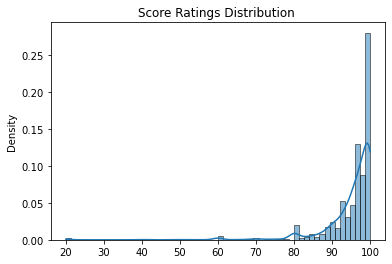

In [79]:

x = np.array(data['review_scores_rating'] )

target_column = x[~np.isnan(x)]

t = sns.histplot(target_column, kde=True, stat="density",
                      bins=int(300 / 5))             
t.axes.set_title( "Score Ratings Distribution " )
plt.show()

#### 11. How many identified hosts are there? What is their percentage over all hosts?

In [80]:
# overall number of hosts
number_of_hosts_overall = len(data["host_id"].value_counts())

# replace 't'(true)->1 and 'f' (false)->0 
d = {'t': 1, 'f': 0}
data = data.assign(host_identity_verified=data["host_identity_verified"].map(d))

# Compute the number of identified hosts
identified_data = data[['host_id','host_identity_verified']].dropna()
identified_data = identified_data[identified_data['host_identity_verified'] == 1]
number_of_hosts_identified = len(identified_data.groupby("host_id"))

percentage = number_of_hosts_identified/number_of_hosts_overall * 100

print("There are " + str(number_of_hosts_identified) + " identified hosts." )
print("Their percentage over all hosts is " + str( format(percentage,".3f")) + " %")

There are 2603 identified hosts.
Their percentage over all hosts is 52.533 %


#### 12. What are the top-20 most common amenities provided by the hosts? 

In [81]:
df = data


df["amenities"] = df["amenities"].apply(clean_rows)

word_dict = {}
for lista in df["amenities"]:
    for item in lista:
        if item not in word_dict:
            word_dict[item] = 1
        else:
            word_dict[item] += 1

most_freq_word = col.Counter(word_dict)
most_freq_dict = {}
print("The top-20 most common amenities that the hosts provide, and the number they appear are: ")
for word, count in most_freq_word.most_common(20):
    most_freq_dict[word] = count
    print(word, ": ", count)

dict_keys = str(most_freq_dict.keys())



    

The top-20 most common amenities that the hosts provide, and the number they appear are: 
 "wifi" :  9009
 "essentials" :  8977
 "air conditioning" :  8858
 "hair dryer" :  8590
 "hangers" :  8505
 "long term stays allowed" :  8393
 "shampoo" :  8075
 "iron" :  8003
 "tv" :  7798
 "hot water" :  6788
 "dedicated workspace" :  6704
 "refrigerator" :  6442
 "dishes and silverware" :  6364
 "kitchen" :  6304
 "cooking basics" :  6167
 "washer" :  6089
 "coffee maker" :  5904
 "elevator" :  5378
"heating" :  5356
 "stove" :  5062


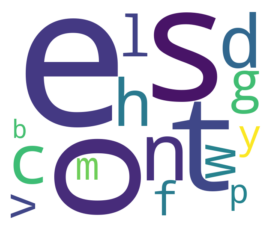

In [82]:
#print wordcloud with most common words

text = ""

for key in dict_keys:
    key = key.replace(" ","_").lstrip("_")
    text += " "+key

####### extra ########
wordcloud = WordCloud(width=680, height=580, margin=0, background_color= "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### 13. Can you identify the top-10 rated listings? Are they by the same host? 

In [83]:

rated_listing = data[['host_id', 'host_url', 'host_name', 'review_scores_rating']].copy()

#def make_clickable(val):
    #return '<a target="_blank" href="{}">{}</a>'.format(val)
#df13b.style.format({'host_url': make_clickable})


sorted_listing = rated_listing.sort_values("review_scores_rating",ascending = False)
max_rating     = max(sorted_listing["review_scores_rating"])

sorted_listing = sorted_listing[sorted_listing["review_scores_rating"] == max_rating]

print("top-10 rated listings are more than 10 because they have the same max rating \n")

print("The number of the top-rated listing are : " + str(len(sorted_listing)) + " \n")

# print(len(sorted_listing))
# sorted_listing

top-10 rated listings are more than 10 because they have the same max rating 

The number of the top-rated listing are : 1966 



#### 14. Can you identify the top-5 rated locations/neighbourhoods?

In [84]:
data.sort_values('review_scores_location', ascending=False).head(5)



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1506,16698464,https://www.airbnb.com/rooms/16698464,20210221153847,2021-02-23,View of Lycabettus,The apartment is 50 square meters close to pub...,Neapoli neighborhood is at the heart of Athens...,https://a0.muscache.com/pictures/5ece826e-ee8c...,110604419,https://www.airbnb.com/users/show/110604419,...,10.0,10.0,10.0,NaN,t,1,1,0,0,4.91
1568,17266861,https://www.airbnb.com/rooms/17266861,20210221153847,2021-02-22,Rock n' Lounge studio in the hip center,"In the city center, in the hip area of Exarche...",Exarchia is the most avant garde and artistic ...,https://a0.muscache.com/pictures/22e655ed-62de...,102314228,https://www.airbnb.com/users/show/102314228,...,10.0,10.0,10.0,00000455604,t,1,1,0,0,4.00
3346,25171168,https://www.airbnb.com/rooms/25171168,20210221153847,2021-02-22,Old Athens ambience suite with garden,An independent fully renovated bedroom with an...,"Welcome to Mets, a quiet,quaint neighborhood, ...",https://a0.muscache.com/pictures/a54e482d-b585...,102717876,https://www.airbnb.com/users/show/102717876,...,10.0,10.0,10.0,10632,t,2,2,0,0,3.74
4091,28021785,https://www.airbnb.com/rooms/28021785,20210221153847,2021-02-23,Traveller's cozy appartment,Our cool and comfortable apartment is situated...,NaN,https://a0.muscache.com/pictures/64780976-06dc...,102768856,https://www.airbnb.com/users/show/102768856,...,10.0,10.0,9.0,00000274887,t,1,1,0,0,0.10
1685,17902276,https://www.airbnb.com/rooms/17902276,20210221153847,2021-02-23,Panathenaic sunny studio!! Varnava square.,Our studio is 3minutes walk from PANATHENAIC S...,The neighborhood is a unique hidden treasure i...,https://a0.muscache.com/pictures/07a23255-3a11...,102674308,https://www.airbnb.com/users/show/102674308,...,10.0,10.0,9.0,00000994216,t,2,2,0,0,4.18


#### 15. What is the distribution of price for each room type?

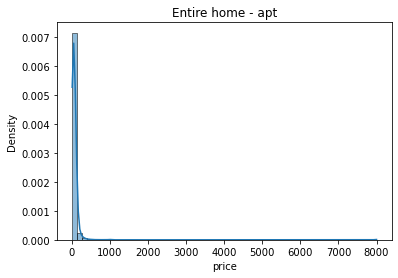

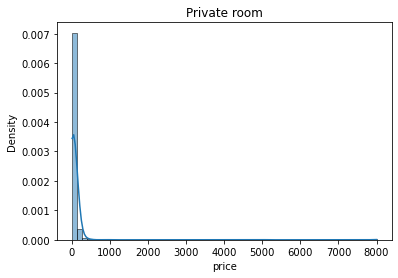

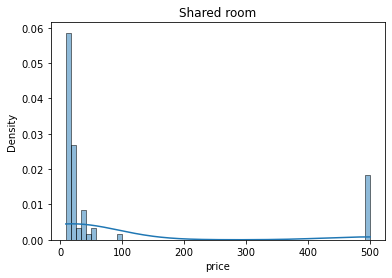

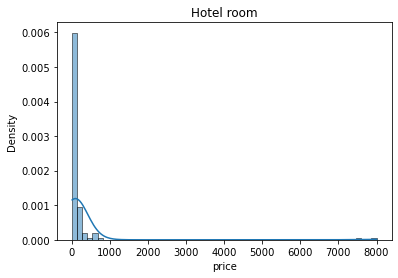

In [85]:
used_columns  = ['room_type','price']
temp_data = data[used_columns]

temp_data['room_type'].unique()

for room in temp_data['room_type'].unique():
     
     # take only the room_type we want     
     d = temp_data.loc[data['room_type'] == room]
     
     # filter dolar symbol $ in the price
     
     # hint: df['a'] = df['a'].apply(lambda x: x + 1)
     
     # use "$" as separator and take the second instance 
     d["price"] = d["price"].apply( lambda x: x.split("$")[1] )
     
     
     # overcome problem with , so replace , with nothing 
     # 1,700 --> 1700
     d["price"] = d["price"].replace({",":""}, regex=True)
     
     # plot distribution
     target_column  = pd.to_numeric(d["price"])
     t = sns.histplot(target_column, kde=True, stat="density",
                      bins=int(300 / 5))
     
     t.axes.set_title( room.replace("/" ," - ") )
     plt.show()
     # fig = t.get_figure()
     # fig.savefig('distribution_of_score_rating_' + room.replace("/" ," - ") +'_.jpg', dpi=400)


     